# Dog breed identification


## I. Initial exploration

In [1]:
import os
PATH = 'data/'
os.listdir(PATH)

['sample_submission.csv', 'test', 'labels.csv', 'data_zip', 'train']

### Submission file

In [2]:
import pandas as pd
df_sample_submission=pd.read_csv(PATH + 'sample_submission.csv')
df_sample_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


### Label table

In [3]:
dflabels=pd.read_csv(PATH + 'labels.csv')
dflabels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


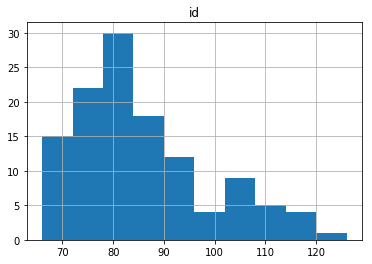

In [4]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

pivot_label=dflabels.pivot_table(index=['breed'],columns=[],aggfunc=len).sort_values(by='id',ascending=False)
pivot_label.hist(bins=10)
pivot_label.head()

### Test/Train set

In [5]:
print('Test')
print(os.listdir(f'{PATH}test/')[:5])

print('\n----------------\n\nTrain')
print(os.listdir(f'{PATH}train/')[:5])


Test
['de084b830010b6107215fef5d4a75b94.jpg', '6b423ca7020e70eb05732843c5d2bad1.jpg', '74aa7e201e0e93e13e87b986a7d31839.jpg', 'a079f72193264bc5685e5d28d7372680.jpg', '583f7580fa5fec1266331fcf83b76fd6.jpg']

----------------

Train
['d8275152fe9027835bec0c405d131a2b.jpg', '44b4684cac2f73ba81b6ed86e45244ad.jpg', 'bc218eeb424cf93092b0a0b23035bbad.jpg', 'eba058daca887257dc71bfd2a0267d29.jpg', '92d23591a857f9adb0024d587683a1cd.jpg']


In [6]:
def plots(ims,figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

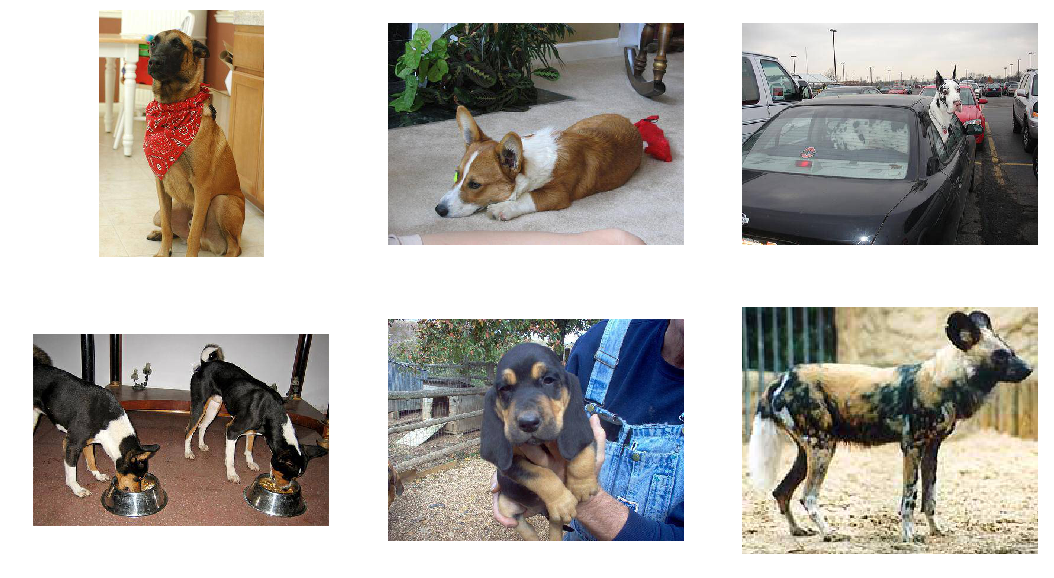

In [7]:
list_img_train=[f'{PATH}train/' + _ for _ in os.listdir(PATH +'train')]
idx=np.random.permutation(len(list_img_train))
img=[plt.imread(list_img_train[idx[i]]) for i in range(6)]
plots(img,figsize=(18,10),rows=2)

Text(0.5,1,'row col hist')

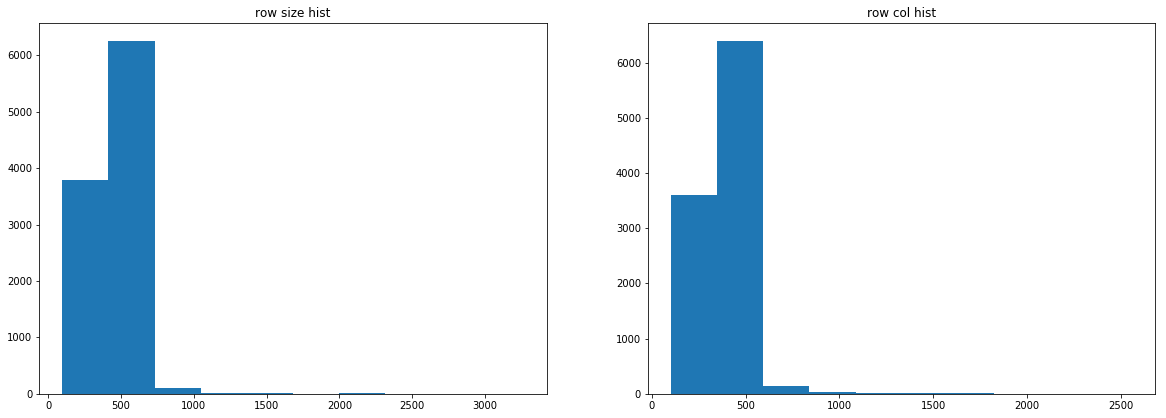

In [8]:
import PIL 
dic_size={i : PIL.Image.open(i).size for i in list_img_train}
sz_row,sz_col=zip(*dic_size.values())

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.hist(sz_row)
plt.title("row size hist")
plt.subplot(2,2,2)
plt.hist(sz_col)
plt.title("row col hist")

## II. Model

## III. Resnet

In [9]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Setup

In [10]:
PATH = ''
val_idxs=get_cv_idxs(len(list(open('data/labels.csv')))-1)
val_idxs

array([2882, 4514, 7717, ..., 8922, 6774,   37])

### First try

In [11]:
run = False
sz=224
bs=64
arch=resnet34
data = ImageClassifierData.from_csv(PATH,folder='data/train',csv_fname='data/labels.csv',test_name='data/test',\
                                    val_idxs=val_idxs, suffix='.jpg',tfms=tfms_from_model(arch, sz),bs=bs)


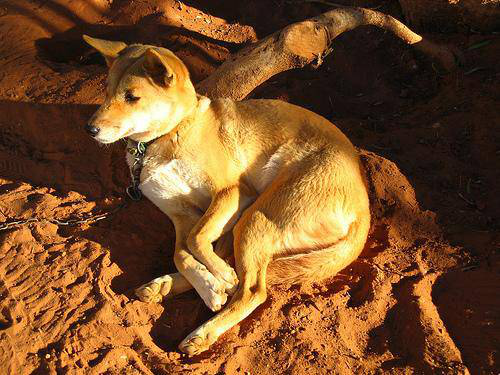

In [12]:
PIL.Image.open(data.trn_ds.fnames[0])


In [13]:
if run:
    learn = ConvLearner.pretrained(arch, data, precompute=True)
    learn.fit(1e-2,5)

In [14]:
if run:
    learn = ConvLearner.pretrained(arch, data, precompute=False)
    learn.fit(1e-2,5)

### Second Model

1. Enable data augmentation, precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

#### Step 1 : Data augmentation enabled

In [15]:
arch=resnext101_64
sz=224
bs=16
def get_data(sz,bs):
    tfms=tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH,folder='data/train',csv_fname='data/labels.csv',test_name='data/test',\
                                    val_idxs=val_idxs, suffix='.jpg',tfms=tfms,bs=bs)
    return data if sz>300 else data.resize(340,'tmp')

data=get_data(sz,bs)

#### Step 2 :Find learning rate

 79%|███████▉  | 405/512 [00:03<00:01, 106.84it/s, loss=6.78]


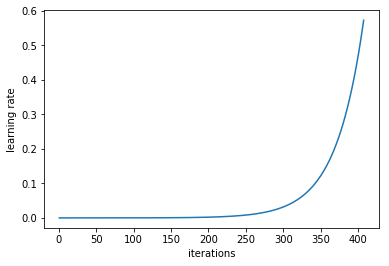

In [16]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.lr_find()
learn.sched.plot_lr()

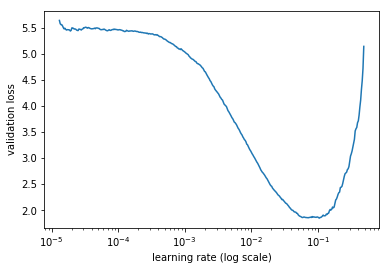

In [17]:
learn.sched.plot()

In [18]:
lr=1e-1

#### Step 3 :Train last layer with precomputed (1 -2 epochs)

In [19]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(lr,4)

epoch      trn_loss   val_loss   accuracy                    
    0      1.820262   1.31535    0.800881  
    1      5.603674   4.298176   0.7818                      
    2      38.648371  26.737764  0.741194                    
    3      316.868241 3853.508954 0.585616                   



[array([3853.50895]), 0.5856164383561644]

#### Step 4 : Train last layer with Data augmentation

In [ ]:
learn.precompute=False
learn.fit(lr,2,cycle_len=1)

 98%|█████████▊| 501/512 [03:20<00:04,  2.50it/s, loss=113]

In [ ]:
learn.save("step4")

#### Step 4 bis : adress overfitting 

In [ ]:
learn.load("step4")

In [ ]:
learn.set_data(get_data(299,bs))
learn.freeze()

In [ ]:
learn.fit(lr,2,cycle_len=1)

In [ ]:
learn.save("step4b")

#### Step 5: Unfreeze

In [ ]:
learn.load("step4b")

In [ ]:
learn.lr_find()
learn.sched.plot()

In [ ]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])
learn.fit(lr,5, cycle_len=1, cycle_mult=2)

## IV . Analizing Results

#### Confusion Matrix 

In [ ]:
probs=np.exp(learn.predict())
preds=np.argmax(probs,axis=1)
y=data.val_y

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm[:10,:10], data.classes[:10],figsize=(18,18))

#### Error analysis

In [ ]:
def plot_most_correct(nb=5):
    print("Most correct classified")
    prob_correct=np.array([probs[i,data.val_y[i]] for i in range(len(data.val_y))]).reshape(-1,1) #prob true class
    correct=  (preds==data.val_y).reshape(-1,1)*prob_correct#prob if correct else 0
    idx=np.argsort(correct[:,0],axis=0)[-nb:]
    img=[plt.imread(path) for path in data.val_ds.fnames[idx]]
    plots_ims(img,figsize=(18,10),rows=1,titles=(prob_correct)[idx])
    
def plot_most_incorrect(nb=5):
    print("Most incorrect classified")
    prob_correct=np.array([probs[i,data.val_y[i]] for i in range(len(data.val_y))]).reshape(-1,1) #prob true class
    correct=(preds!=data.val_y)*prob_correct
    idx=np.argsort(correct[:,0],axis=0)[:nb]
    img=[plt.imread(path) for path in data.val_ds.fnames[idx]]
    plots_ims(img,figsize=(18,10),rows=1,titles=np.squeeze(prob_correct)[idx])
    

plot_most_correct()
plot_most_incorrect()

#### Submission

In [ ]:
probs=np.exp(learn.predict(is_test=True))
id=np.array([_[10:][:-4] for _ in data.test_ds.fnames]).reshape(-1,1)
pd.DataFrame(np.hstack((id,probs)),columns=['id']+data.classes).to_csv('submission.csv',index=False)